In [1]:
from tool import lag, maximum, minimum, crossover, crossunder, preprocess
from strategy import Strategy

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.date = data.date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
data.head()

,id,name,date,open,high,low,close,volume,foreign,trust,dealer
0,1101,台泥,2000-12-12,5.78,5.93,5.75,5.82,11092,414,40,100
1,1102,亞泥,2000-12-12,4.89,4.97,4.89,4.94,2112,1016,200,0
2,1216,統一,2000-12-12,6.58,6.70,6.55,6.58,5951,2472,-100,51
3,1301,台塑,2000-12-12,13.38,13.51,13.24,13.24,3679,34,-250,-28
4,1303,南亞,2000-12-12,12.16,12.33,12.13,12.24,10237,2441,1217,-180


In [13]:
# data
stock_2330 = data[data.id == 2330]
stock_1101 = data[data.id == 1101]
stock_2330, stock_1101 = preprocess(stock_2330, stock_1101)


# 計算指標
stock_2330['ma20'] = stock_2330.close.rolling(20).mean()
stock_2330['ma5'] = stock_2330.close.rolling(5).mean()

# 進出場訊號
condition_in = [
    stock_2330.close > lag(maximum(stock_2330.high, 50)),
    stock_2330.ma5 > stock_2330.ma20
]

condition_out = [
    stock_2330.close < (lag(maximum(stock_2330.high, 30)) + lag(minimum(stock_2330.low, 30)))/2
]

In [14]:
donchian_strategy = Strategy()
donchian_strategy.run(stock_2330, stock_1101, condition_in, condition_out)

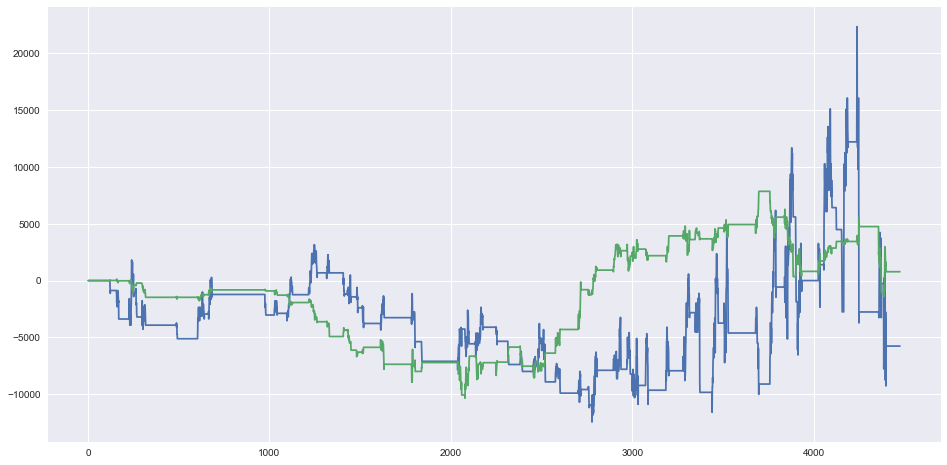

In [15]:
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
plt.plot(donchian_strategy.buy_stock_result.cumulative_profit)
plt.plot(donchian_strategy.sellshort_stock_result.cumulative_profit);